# Machine Learning

After choosing the variables that we want to use for fitting models, we then fit them into three models which are
> 1. **Logistic Regression** <br>
> 2. **Random Forest** <br>
> 3. **Gradient Boosting**

First of all, importing the essential libraries

In [1]:
#import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
sb.set()

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', None)  # Unlimited columns.
pd.options.mode.use_inf_as_na = True        # Any inf or -inf is 
                                            # treated as NA.

In [2]:
#read the file with organized data
diabetes_use = pd.read_csv('dataset/diabetes_EDA.csv')

<br>

We then put the responses and variables into `_condition` and `_variables` respectively for the splitting of data into **train set** and **test set**.

<br>

In [3]:
#putting data into respective file
diabetes_condition = pd.DataFrame(diabetes_use['Diabetes_binary'])
diabetes_variables = pd.DataFrame(diabetes_use[["HighBP", "HighChol","DiffWalk", "BMI", "GenHlth", "PhysHlth", "Age", "Income","HeartDiseaseorAttack","Smoker"]])

#splitting data
x_train, x_test, y_train, y_test = train_test_split(diabetes_variables, diabetes_condition, test_size = 0.25)

### Defining Functions
For futher convenience, we decide to define a function `print_confusion` to print confusion matrix for **train** and **test** datasets together with:
- Classification accuracy
- True Positive Rate
- False Negative Rate
- True Negative Rate
- False Positive Rate

In [4]:
def print_confusion(model, x_train, x_test, y_train, y_test):
    #Prediction on both train and test data set
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Print the classification accuracy
    print("The classification accuracy of Train Set \t:", round(model.score(x_train, y_train)*100, 2), "%")
    print("The classification accuracy of Test Set \t:", round(model.score(x_test, y_test)*100, 2), "%")

    #printing a space between 
    print()

    #Print the TPR and FPR for train set
    lr_tr = confusion_matrix(y_train, y_train_pred)
    FP_tr_3 = lr_tr[0][1]
    FN_tr_3 = lr_tr[1][0]
    TP_tr_3 = lr_tr[1][1]
    TN_tr_3 = lr_tr[0][0]
    print("For train set")
    print("The True Positive Rate of trian set for this model \t:", round(TP_tr_3/(FN_tr_3 + TP_tr_3)*100, 2), "%")
    print("The False Negative Rate of train set of this model \t:", round(FN_tr_3/(TP_tr_3 + FN_tr_3)*100, 2), "%")
    print("The True Negative Rate of train set of this model \t:", round(TN_tr_3/(TN_tr_3 + FP_tr_3)*100, 2), "%")
    print("The False Positive Rate of train set for this model \t:", round(FP_tr_3/(FP_tr_3 + TN_tr_3)*100, 2), "%")

    #printing a space between 
    print()

    #Print the TPR and FPR for test set
    lr_tt = confusion_matrix(y_test, y_test_pred)
    FP_tt_3 = lr_tt[0][1]
    FN_tt_3 = lr_tt[1][0]
    TP_tt_3 = lr_tt[1][1]
    TN_tt_3 = lr_tt[0][0]
    print("For test set")
    print("The True Positive Rate of test set for this model \t:", round(TP_tt_3/(FN_tt_3 + TP_tt_3)*100, 2), "%")
    print("The False Negative Rate of test set of this model \t:", round(FN_tt_3/(TP_tt_3 + FN_tt_3)*100, 2), "%")
    print("The True Negative Rate of test set of this model \t:", round(TN_tt_3/(TN_tt_3 + FP_tt_3)*100, 2), "%")
    print("The False Positive Rate of test set for this model \t:", round(FP_tt_3/(FP_tt_3 + TN_tt_3)*100, 2), "%")

    #Print the two-way confusion map for train(left) and test(right)
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    axes[0].set_title("Train set")
    axes[1].set_title("Test set")

### Model Fitting

#### Model 1: Logistic Regression

In [5]:
#import essential file for Logistic Regression
from sklearn.linear_model import LogisticRegression
l_regression = LogisticRegression()
l_regression.fit(x_train, y_train)
l_regression.fit(x_test, y_test)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

LogisticRegression()

The classification accuracy of Train Set 	: 74.15 %
The classification accuracy of Test Set 	: 73.62 %

For train set
The True Positive Rate of trian set for this model 	: 75.2 %
The False Negative Rate of train set of this model 	: 24.8 %
The True Negative Rate of train set of this model 	: 73.15 %
The False Positive Rate of train set for this model 	: 26.85 %

For test set
The True Positive Rate of test set for this model 	: 74.72 %
The False Negative Rate of test set of this model 	: 25.28 %
The True Negative Rate of test set of this model 	: 72.56 %
The False Positive Rate of test set for this model 	: 27.44 %


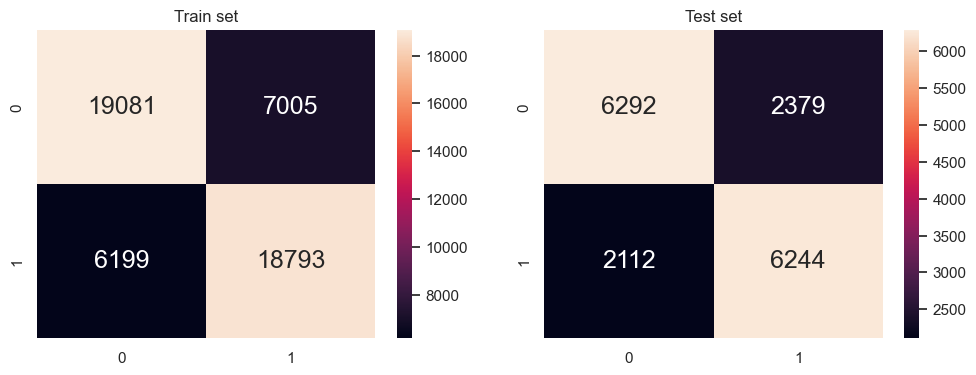

In [6]:
print_confusion(l_regression, x_train, x_test, y_train, y_test)

#### Model 2: Random Forest 

In [7]:
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier()
r_forest.fit(x_train, y_train)
r_forest.fit(x_test, y_test)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

The classification accuracy of Train Set 	: 71.05 %
The classification accuracy of Test Set 	: 96.95 %

For train set
The True Positive Rate of trian set for this model 	: 73.74 %
The False Negative Rate of train set of this model 	: 26.26 %
The True Negative Rate of train set of this model 	: 68.48 %
The False Positive Rate of train set for this model 	: 31.52 %

For test set
The True Positive Rate of test set for this model 	: 96.27 %
The False Negative Rate of test set of this model 	: 3.73 %
The True Negative Rate of test set of this model 	: 97.6 %
The False Positive Rate of test set for this model 	: 2.4 %


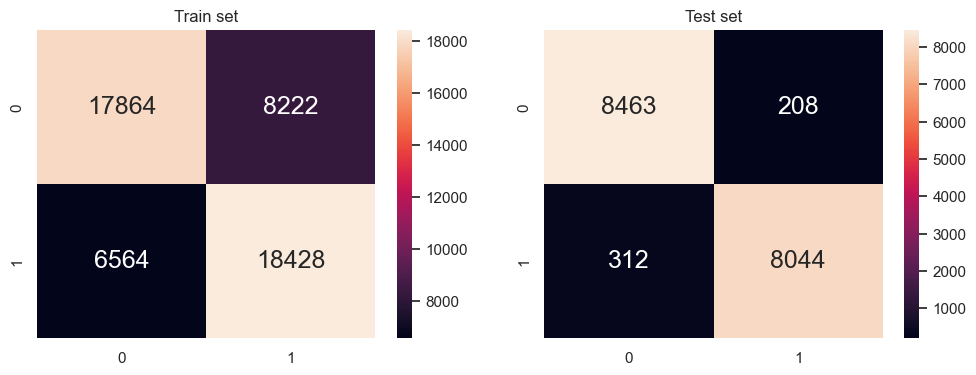

In [8]:
print_confusion(r_forest, x_train, x_test, y_train, y_test)

#### Model 3: Gradient Boosting

In [9]:
from sklearn.neural_network import MLPClassifier
n_network = MLPClassifier()
n_network.fit(x_train, y_train)
n_network.fit(x_test, y_test)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

The classification accuracy of Train Set 	: 74.16 %
The classification accuracy of Test Set 	: 74.33 %

For train set
The True Positive Rate of trian set for this model 	: 82.38 %
The False Negative Rate of train set of this model 	: 17.62 %
The True Negative Rate of train set of this model 	: 66.28 %
The False Positive Rate of train set for this model 	: 33.72 %

For test set
The True Positive Rate of test set for this model 	: 82.64 %
The False Negative Rate of test set of this model 	: 17.36 %
The True Negative Rate of test set of this model 	: 66.32 %
The False Positive Rate of test set for this model 	: 33.68 %


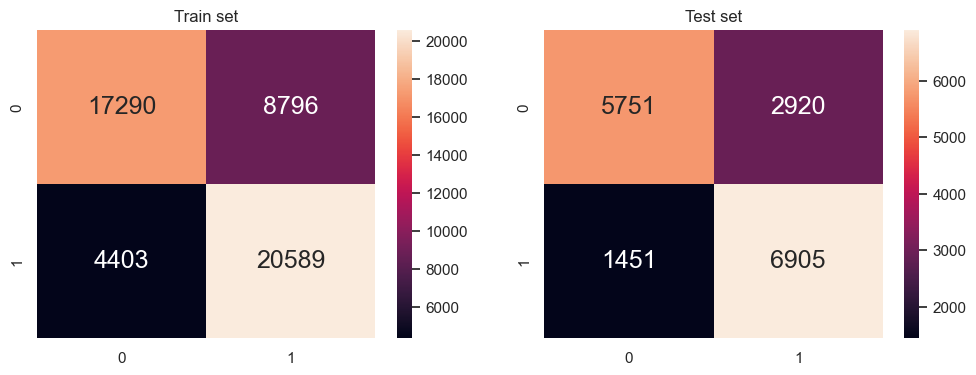

In [10]:
print_confusion(n_network, x_train, x_test, y_train, y_test)